In [1]:
%reload_ext autoreload
%autoreload 2

import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

ser = serial.Serial('COM3', 9600, timeout=1)
dut.connect(ser)


In [5]:
dut.power_on()

In [8]:
volt_in = np.arange(0.44, 4.0, 0.1)
volt_out_list = []

adc_raw=[]
for addr_fifo in range(12):
    print(addr_fifo, end='->')
    data = dut.calibrate_adc(volt_in, addr_fifo=addr_fifo )
    volt_out_list.append( [dut.adc2volt(d) for d in data] )
    adc_raw.append(data)

0->1->2->3->4->5->6->7->8->9->10->11->

Text(0, 0.5, 'Quality number')

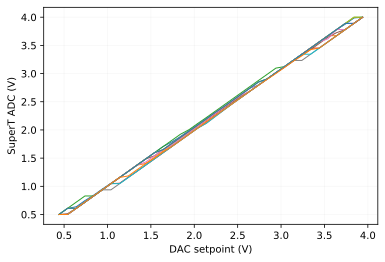

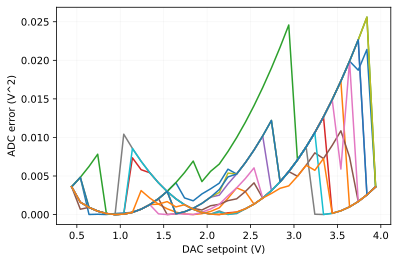

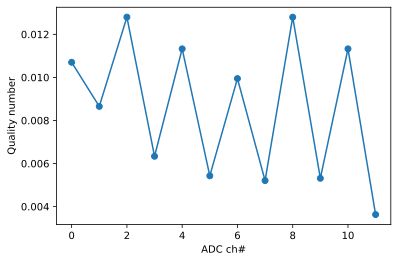

In [9]:
volt_out_list = np.array(volt_out_list)

adc_quality = []

plt.figure(1)
plt.xlabel('DAC setpoint (V)')
plt.ylabel('SuperT ADC (V)')
plt.grid(True, alpha=0.1)

for i, volt_out in enumerate(volt_out_list):
    plt.figure(1)
    plt.plot(volt_in, volt_out, linewidth=1)
    
    voffset=0
    volt_err2 = []
    for vin, vout in zip(volt_in, volt_out):
        volt_err2.append( (vout-vin -voffset)**2 )
    volt_err2 = np.array(volt_err2)
    adc_quality.append( (np.max(volt_err2) - np.min(volt_err2))/2 )
        
    plt.figure(2)
    plt.plot(volt_in, volt_err2)

plt.grid(True, alpha=0.1)
plt.xlabel('DAC setpoint (V)')
plt.ylabel('ADC error (V^2)')
    
plt.figure(3)
plt.plot(range(12), adc_quality, 'o-')
plt.xlabel('ADC ch#')
plt.ylabel('Quality number')

In [25]:

import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
# %config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

5.00-

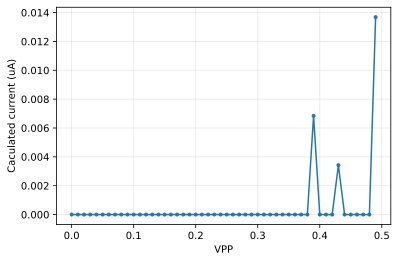

In [10]:
ar=2
r=31
c=0

Vreads = np.arange(0, 0.5, 0.01)
# Vgates = np.arange(0,5,0.5)
# Vgates = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 5]
Vgates = [5]

volts_set = []

for Vgate in Vgates:
    print(f'{Vgate:.2f}', end='-')
    volts = []
    for vread in Vreads:
        volts.append( a0.read_single_int(vread, Vgate, array=ar, row=r, col=c, gain=4) )
    volts_set.append(volts)
    
for volts in volts_set:
    plt.plot(Vreads, [i* 1e6 for i in volts], '.-')
    
plt.xlabel('VPP')
plt.ylabel('Caculated current (uA)')
plt.grid(True, alpha=0.3)
# plt.ylim(-0.1, 6)

5.00-

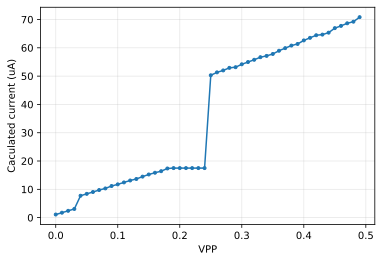

In [29]:
# ar=2
# r=31
# c=0
ar=0
r=30
c=30


Vreads = np.arange(0, 0.5, 0.01)
# Vgates = np.arange(0,5,0.5)
# Vgates = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 5]
Vgates = [5]

volts_set = []

dut.dac_set('DAC_VREF_HI_CMP', 4.92)

for Vgate in Vgates:
    print(f'{Vgate:.2f}', end='-')
    volts = []
    for vread in Vreads:
        volts.append( a0.read_single_int(vread, Vgate, array=ar, row=r, col=c, gain=-1) )
    volts_set.append(volts)

dut.dac_set('DAC_VREF_HI_CMP', 3.92)

for volts in volts_set:
    plt.plot(Vreads, [i* 1e6 for i in volts], '.-')
    
plt.xlabel('VPP')
plt.ylabel('Caculated current (uA)')
plt.grid(True, alpha=0.3)
# plt.ylim(-0.1, 6)

5.00-

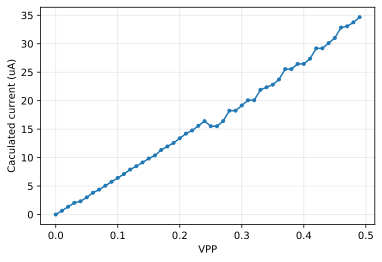

In [31]:
ar=0
r=30
c=30

Vreads = np.arange(0, 0.5, 0.01)
Vgates = [5]

volts_set = []

dut.dac_set('DAC_VREF_HI_CMP', 3.92)

for Vgate in Vgates:
    print(f'{Vgate:.2f}', end='-')
    volts = []
    for vread in Vreads:
        volts.append( a0.read_single_int(vread, Vgate, array=ar, row=r, col=c, gain=-1) )
    volts_set.append(volts)

dut.dac_set('DAC_VREF_HI_CMP', 3.92)

for volts in volts_set:
    plt.plot(Vreads, [i* 1e6 for i in volts], '.-')
    
plt.xlabel('VPP')
plt.ylabel('Caculated current (uA)')
plt.grid(True, alpha=0.3)
# plt.ylim(-0.1, 6)

In [27]:
Gmap = a0.pic_read_batch(1, gain=3)

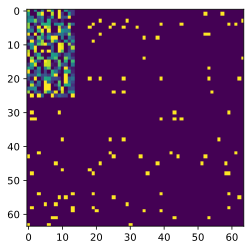

In [28]:
plt.imshow(Gmap)

In [37]:
adc_raw = a0.read_single_int(vread, Vgate, array=ar, row=r, col=c, gain=-1, raw=True)
print(f'{adc_raw:013b}')

volt = dut.adc2volt(adc_raw)
print(f'{volt:.4f} V')

gain = adc_raw >> 10
print(f'gain = {gain:d}')

curr = a0.adc2current(adc_raw, 0.5)
print(f'curr = {curr*1e6:.4f} uA')

0100100110000
1.5401 V
gain = 2
curr = 34.6693 uA


In [35]:
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray

adc_raw = a0.read_single_int(vread, Vgate, array=ar, row=r, col=c, gain=-1, raw=True)
print(adc_raw)

2352


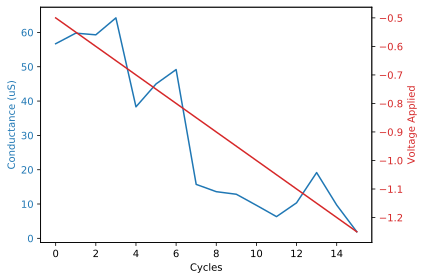

In [39]:
VreadGate = 5.0
vRead = 0.2

arr = 0
startRow = 61
rr = 61
cc = 26
startCol = 26
numRows = 1
numCols = 1

vAppliedReset = np.arange(0.5, 3.4, 0.05)
vGateSet = np.arange(0.5, 1.6, 0.05)
vGateReset = np.arange(5.0, 5.5, 0.5)

thisGHistory = []
thisVHistory = []

gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.3e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])
thisGtarget = 4e-6
for vgate in vGateReset:
    for vappreset in vAppliedReset:
        # Apply vappreset pulse, then read
        a0.reset_single_int(vappreset, vgate, array=arr, row=rr, col=cc)
        for gg in gains:
            #rdCurr = a0.read_single_int(vRead, VreadGate, array=arr, row=rr, col=cc, gain=gg)
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, skip_conf=False, gain=gg)
            if rdCurr < maxCurr[gg]:
                break
        currG = rdCurr/vRead
        thisGHistory.append(currG)
        thisVHistory.append(-1*vappreset)
        if currG <= thisGtarget:
            break
    if currG <= thisGtarget:
        break

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Cycles')
ax1.set_ylabel('Conductance (uS)', color=color)
ax1.plot([i* 1e6 for i in thisGHistory], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.set_ylabel('Voltage Applied', color=color)
ax2.plot(thisVHistory, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

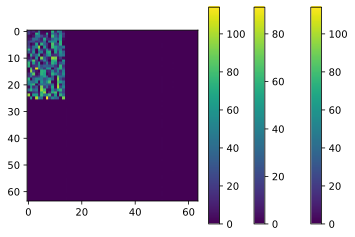

In [40]:
arr = 0
numRows = 64
numCols = 64
vRead = 0.2
vReadGate = 5.0
gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.2e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])
Gmap0 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            for gg in gains:
                    #rdCurr = a0.read_single_int(vRead, vReadGate, array=arr, row=rr, col=cc, gain=gg)
                    rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, skip_conf=False, gain=gg)
                    if rdCurr < maxCurr[gg]:
                        break
            Gmap0[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap0)
plt.colorbar()

arr = 1
numRows = 64
numCols = 64
vRead = 0.2
vReadGate = 5.0
gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.2e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])
Gmap1 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            for gg in gains:
                    #rdCurr = a0.read_single_int(vRead, vReadGate, array=arr, row=rr, col=cc, gain=gg)
                    rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, skip_conf=False, gain=gg)
                    if rdCurr < maxCurr[gg]:
                        break
            Gmap1[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap1)
plt.colorbar()

arr = 2
numRows = 64
numCols = 64
vRead = 0.2
vReadGate = 5.0
gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.2e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])
Gmap2 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            for gg in gains:
                    #rdCurr = a0.read_single_int(vRead, vReadGate, array=arr, row=rr, col=cc, gain=gg)
                    rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, skip_conf=False, gain=gg)
                    if rdCurr < maxCurr[gg]:
                        break
            Gmap2[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap2)
plt.colorbar()

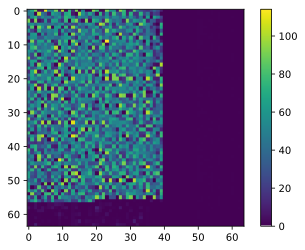

In [41]:
plt.imshow(Gmap0)
plt.colorbar()

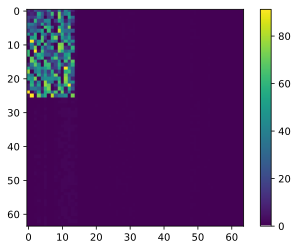

In [42]:
plt.imshow(Gmap1)
plt.colorbar()

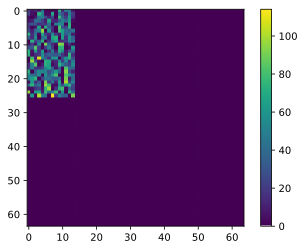

In [43]:
plt.imshow(Gmap2)
plt.colorbar()

In [44]:
VADC_boundary = np.array([0.9, 1.692, 1.927, 2.247, 2.645, 3.045, 3.391, 3.688, 4.1])
VRefHiCmp = np.array([5.3, 4.5, 4.2, 3.8, 3.4, 3.0, 2.7, 2.4])
_gain_ratio = [
    1e3,
    5e3,
    30e3,
    200e3,
    1e6
]

dut.dac_set('DAC_VREF_HI_CMP', 4.0)

ts = time.time()

arr = 0
numRows = 64
numCols = 64
vRead = 0.2
vReadGate = 5.0
gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.2e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])
Gmap2step = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            adc_raw = a0.read_single_int(vread, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
            VADC_read_first = dut.adc2volt(adc_raw)
            gainFirst = adc_raw >> 10
            secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
            secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]
            dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp)                        
            VADC_read_sec = dut.adc2volt(a0.read_single_int(vread, Vgate, array=arr, row=rr, col=cc, gain=gainFirst, raw=True))
            finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
            dut.dac_set('DAC_VREF_HI_CMP', 4.0)
            rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]
            Gmap2step[rr,cc] = 1e6*rdCurr/vRead
#plt.imshow(Gmap2step)
#plt.colorbar()

print(time.time()-ts)

ts2 = time.time()

arr = 0
numRows = 64
numCols = 64
vRead = 0.2
vReadGate = 5.0
gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.2e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])
Gmap = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            for gg in gains:
                    #rdCurr = a0.read_single_int(vRead, vReadGate, array=arr, row=rr, col=cc, gain=gg)
                    rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, skip_conf=False, gain=gg)
                    if rdCurr < maxCurr[gg]:
                        break
            Gmap[rr,cc] = 1e6*rdCurr/vRead
            
print(time.time()-ts2)

614.4253351688385
116.07876062393188


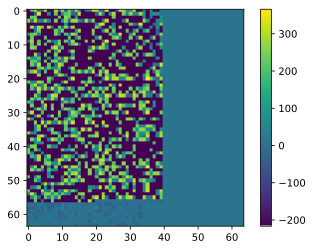

In [45]:
plt.imshow(Gmap2step)
plt.colorbar()

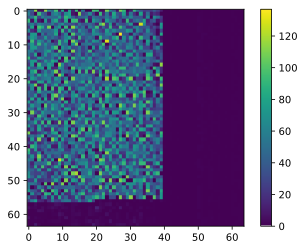

In [46]:
plt.imshow(Gmap)
plt.colorbar()

1.491102933883667


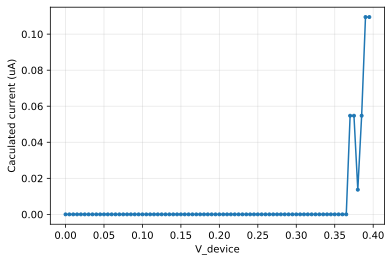

In [121]:
arr=0
rr=9
cc=22

Vreads = np.arange(0, 0.4, 0.005)
Vgate = 5
Vref = 0.5

volts = []
ts = time.time()
for vread in Vreads:
    for gg in gains:
        #rdCurr = a0.read_single_int(vRead, vReadGate, array=arr, row=rr, col=cc, gain=gg)
        rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vread, skip_conf=False, gain=gg)
        if rdCurr < maxCurr[gg]:
            break
    volts.append(rdCurr)
    #volts.append( a0.pic_read_single(arr, rr, cc, Vread = vread, skip_conf=False, gain=gg) )
print(time.time()-ts)
plt.plot(Vreads, [i* 1e6 for i in volts], '.-')
    
plt.xlabel('V_device')
plt.ylabel('Caculated current (uA)')
plt.grid(True, alpha=0.3)

6.088553428649902


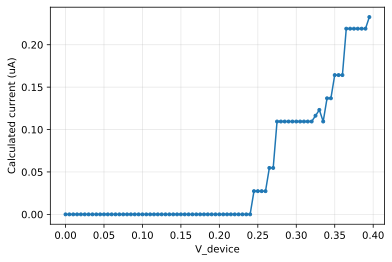

In [119]:
#dut.vrefs_defaults()
arr=0
rr=9
cc=22
ts = time.time()
Vreads = np.arange(0, 0.4, 0.005)
Vgate = 5
Vref = 0.5

volts2 = []
for vread in Vreads:
    #volts.append( a0.pic_read_single(ar, r, c, Vread = vread, skip_conf=False, gain=gg) )
    volts2.append( a0.read_single_int(vread, Vgate, array=arr, row=rr, col=cc, gain=-1))
plt.plot(Vreads, [i* 1e6 for i in volts2], '.-')
print(time.time()-ts)

plt.xlabel('V_device')
plt.ylabel('Calculated current (uA)')
plt.grid(True, alpha=0.3)    

12.389044284820557


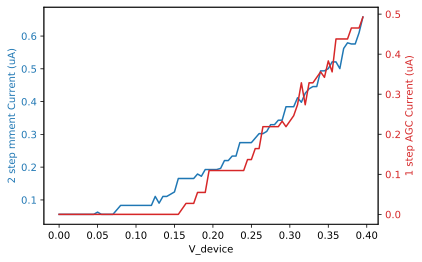

In [128]:
#VADC_boundary = np.array([0.9, 1.692, 1.927, 2.247, 2.645, 3.045, 3.391, 3.688, 4.1])
#VRefHiCmp = np.array([5.3, 4.5, 4.2, 3.8, 3.4, 3.0, 2.7, 2.4])
VADC_boundary = np.array([0.4, 1.692, 1.927, 2.247, 2.645, 3.045, 3.391, 3.688, 4.1])
VRefHiCmp = np.array([5.0, 4.5, 4.2, 3.8, 3.4, 3.0, 2.7, 2.4])

_gain_ratio = [
    1e3,
    5e3,
    30e3,
    200e3,
    1e6
]

vOffset = -0.08
dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)

#ts = time.time()

arr = 0
rr = 9
cc = 22
vRead = 0.2
vReadGate = 5.0
Vreads = np.arange(0, 0.4, 0.005)
Vgate = 5
Vref = 0.5
CurrRead2Step = []
vRefHiCmpHistory = []
VADCHistory = []
rdCurrFirstHistory = []

ts = time.time()
for vread in Vreads:

    adc_raw = a0.read_single_int(vread, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
    VADC_read_first = dut.adc2volt(adc_raw)
    VADCHistory.append(VADC_read_first)
    gainFirst = adc_raw >> 10
    rdCurrFirst = (VADC_read_first - 0.5) / _gain_ratio[gainFirst]
    rdCurrFirstHistory.append(rdCurrFirst)
    secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
    secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]+vOffset
    vRefHiCmpHistory.append(secondVRefHiCmp)
    dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp) 
    #time.sleep(0.1)
    VADC_read_sec = dut.adc2volt(a0.read_single_int(vread, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True))
    finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
    dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
    #time.sleep(0.1)
    rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]
    CurrRead2Step.append(rdCurr)
print(time.time()-ts)

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('V_device')
ax1.set_ylabel('2 step mment Current (uA)', color=color)
ax1.plot(Vreads, [i*1e6 for i in CurrRead2Step], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.set_ylabel('1 step AGC Current (uA)', color=color)
ax2.plot(Vreads, [i*1e6 for i in rdCurrFirstHistory], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#plt.plot(Vreads, [i* 1e6 for i in CurrRead2Step], '.-')
#plt.xlabel('V_device')
#plt.ylabel('Calculated current (uA)')
#plt.grid(True, alpha=0.3) 

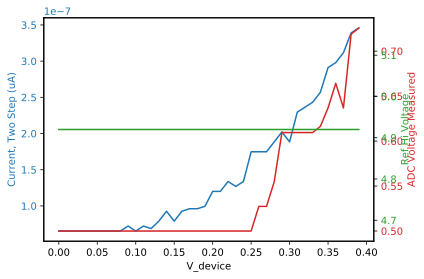

In [115]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('V_device')
ax1.set_ylabel('Current, Two Step (uA)', color=color)
ax1.plot(Vreads, CurrRead2Step, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.set_ylabel('ADC Voltage Measured', color=color)
ax2.plot(Vreads, VADCHistory, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
# we already handled the x-label with ax1
ax3.set_ylabel('Ref Hi Voltage', color=color)
ax3.plot(Vreads, vRefHiCmpHistory, color=color)
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [95]:
Vreads = np.arange(0, 0.4, 0.02)
np.shape(Vreads)

(20,)

In [123]:
import scipy.io as sio
#load_workspace(vars(), '20190814-205207-CNN weights')
mat_contents = sio.loadmat('UpdatedGfc.mat')
finalGfc = mat_contents['finalGfc']

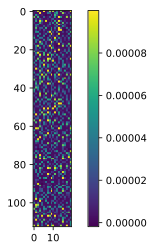

In [124]:
plt.imshow(finalGfc)
plt.colorbar()

Loaded: Gconv, Gfc, Mconv, Mfc, 


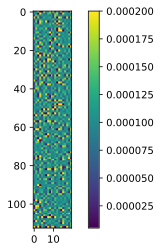

In [127]:
from lib_data import *

load_workspace(vars(), '20190814-205207-CNN weights')
plt.imshow(Gfc)
plt.colorbar()

12.516071796417236


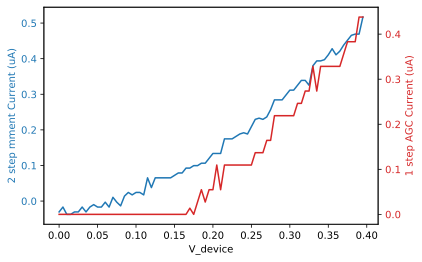

In [132]:
VADC_boundary = np.array([0.4, 1.692, 1.927, 2.247, 2.645, 3.045, 3.391, 3.688, 4.1])
VRefHiCmp = np.array([5.0, 4.5, 4.2, 3.8, 3.4, 3.0, 2.7, 2.4])

_gain_ratio = [
    1e3,
    5e3,
    30e3,
    200e3,
    1e6
]

vOffset = -0.08
dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)

#ts = time.time()

arr = 0
rr = 9
cc = 22
vRead = 0.2
vReadGate = 5.0
Vreads = np.arange(0, 0.4, 0.005)
Vgate = 5
Vref = 0.5
CurrRead2Step = []
vRefHiCmpHistory = []
VADCHistory = []
rdCurrFirstHistory = []

ts = time.time()
for vread in Vreads:

    adc_raw = a0.read_single_int(vread, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
    VADC_read_first = dut.adc2volt(adc_raw)
    VADCHistory.append(VADC_read_first)
    gainFirst = adc_raw >> 10
    rdCurrFirst = (VADC_read_first - 0.5) / _gain_ratio[gainFirst]
    rdCurrFirstHistory.append(rdCurrFirst)
    secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
    secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]+vOffset
    vRefHiCmpHistory.append(secondVRefHiCmp)
    dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp+vOffset) 
    #time.sleep(0.1)
    VADC_read_sec = dut.adc2volt(a0.read_single_int(vread, Vgate, array=arr, row=rr, col=cc, gain=gainFirst, raw=True))
    finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
    dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
    #time.sleep(0.1)
    rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]
    CurrRead2Step.append(rdCurr)
print(time.time()-ts)

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('V_device')
ax1.set_ylabel('2 step mment Current (uA)', color=color)
ax1.plot(Vreads, [i*1e6 for i in CurrRead2Step], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.set_ylabel('1 step AGC Current (uA)', color=color)
ax2.plot(Vreads, [i*1e6 for i in rdCurrFirstHistory], color=color)
ax2.tick_params(axis='y', labelcolor=color)

Working on array 0 , device (row= 0 col= 0 )
Array 0 , device (row= 0 col= 0 ) Init G= 4.31021505376344e-05  Target G= 1.9999999949504854e-06  Final G= 2.105767350928641e-06
Working on array 0 , device (row= 1 col= 0 )
Array 0 , device (row= 1 col= 0 ) Init G= 5.079276637341155e-05  Target G= 4.981069196219323e-06  Final G= 8.825708699902248e-06
Working on array 0 , device (row= 2 col= 0 )
Array 0 , device (row= 2 col= 0 ) Init G= 1.942424242424243e-05  Target G= 1.9999999949504854e-06  Final G= 1.9755620723362673e-06
Working on array 0 , device (row= 3 col= 0 )
Array 0 , device (row= 3 col= 0 ) Init G= 8.615835777126102e-05  Target G= 7.723643648205325e-05  Final G= 7.837829912023459e-05
Working on array 0 , device (row= 4 col= 0 )
Array 0 , device (row= 4 col= 0 ) Init G= 3.574633431085043e-05  Target G= 1.9999999949504854e-06  Final G= 5.749462365591398e-06
Working on array 0 , device (row= 5 col= 0 )
Array 0 , device (row= 5 col= 0 ) Init G= 2.601026392961877e-05  Target G= 1.99999

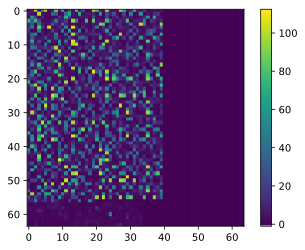

In [133]:
VreadGate = 5.0
vRead = 0.2
arr = 0
startRow = 0
startCol = 0
numRows = 57
numCols = 40
GMin = 2e-6
GMax = 100e-6
# Take previous code by putting finalGfc in scaledGfc
scaledGfc = finalGfc
# First reshape Gfc to fit within the 64 rows
# reshape from 113x20 to 57x40
newGfc = np.zeros((57,40))+GMin
newGfc[0:57,0:20]=scaledGfc[0:57,0:20]
newGfc[0:56,20:40]=scaledGfc[57:113,0:20]

targetGVals = newGfc
targetGThresh = 4e-6
targetRows = np.arange(startRow, startRow+numRows)
targetCols = np.arange(startCol, startCol+numCols)

vAppliedSet = np.arange(0.5, 2.5, 0.1)
vAppliedReset = np.arange(0.5, 3.2, 0.1)
vGateSet = np.arange(0.5, 1.7, 0.05)
vGateReset = np.arange(5.0, 5.5, 0.5)

gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.3e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])

GHistory = []
VHistory = []

VADC_boundary = np.array([0.4, 1.692, 1.927, 2.247, 2.645, 3.045, 3.391, 3.688, 4.1])
VRefHiCmp = np.array([5.0, 4.5, 4.2, 3.8, 3.4, 3.0, 2.7, 2.4])

_gain_ratio = [
    1e3,
    5e3,
    30e3,
    200e3,
    1e6
]

vOffset = -0.08
dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
Vgate = 5
Vref = 0.5


for j in range(numCols):
    cc = targetCols[j]
    for i in range(numRows):
        rr = targetRows[i]
        #print('Working on array', arr, ', device (row=', rr, 'col=', cc, ')')
        thisGtarget = targetGVals[i,j]
        thisGHistory = []
        thisVHistory = []
        thisGainHistory = []
        # Do a first read of this device
        adc_raw = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
        VADC_read_first = dut.adc2volt(adc_raw)
        gainFirst = adc_raw >> 10
        secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
        secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]+vOffset
        dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp+vOffset) 
        VADC_read_sec = dut.adc2volt(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=gainFirst, raw=True))
        finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
        dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
        rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]
        
        currG = rdCurr/vRead
        thisGHistory.append(currG)
        thisVHistory.append(0)
        #print('Initial G=', currG, 'Target G =', thisGtarget)
        initG = currG
        # Now, if device is lower than target, SET it
        if currG < (thisGtarget-targetGThresh):
            for vgate in vGateSet:
                for vappset in vAppliedSet:
                    # Apply vappset pulse, then read
                    a0.set_single_int(vappset, vgate, array=arr, row=rr, col=cc)

                    adc_raw = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
                    VADC_read_first = dut.adc2volt(adc_raw)
                    gainFirst = adc_raw >> 10
                    secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
                    secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]+vOffset
                    dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp+vOffset) 
                    VADC_read_sec = dut.adc2volt(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=gainFirst, raw=True))
                    finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
                    dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
                    rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]
                
                    currG = rdCurr/vRead
                    thisGHistory.append(currG)
                    thisVHistory.append(vappset)
                    if currG >= (thisGtarget-targetGThresh):
                        break
                if currG >= (thisGtarget-targetGThresh):
                    break
            GHistory.append(thisGHistory)
            VHistory.append(thisVHistory)

        # Else, if device is higher than target, RESET it, then SET it
        elif currG > (thisGtarget+targetGThresh):
            for vgate in vGateReset:
                for vappreset in vAppliedReset:
                    # Apply vappreset pulse, then read
                    a0.reset_single_int(vappreset, vgate, array=arr, row=rr, col=cc)

                    adc_raw = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
                    VADC_read_first = dut.adc2volt(adc_raw)
                    gainFirst = adc_raw >> 10
                    secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
                    secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]+vOffset
                    dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp+vOffset) 
                    VADC_read_sec = dut.adc2volt(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=gainFirst, raw=True))
                    finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
                    dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
                    rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]

                    currG = rdCurr/vRead
                    thisGHistory.append(currG)
                    thisVHistory.append(-1*vappreset)
                    if currG <= (thisGtarget+targetGThresh):
                        break
                if currG <= (thisGtarget+targetGThresh):
                    break

            #Now if it is below Gtarget, then do SET operations; If it is above Gtarget, then Reset failed and device stuck ON
            
            #if currG <= thisGtarget and thisGtarget >= 2.5e-6:
            if currG <= (thisGtarget-targetGThresh):
                for vgate in vGateSet:
                    for vappset in vAppliedSet:
                        # Apply vappset pulse, then read
                        a0.set_single_int(vappset, vgate, array=arr, row=rr, col=cc)

                        adc_raw = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
                        VADC_read_first = dut.adc2volt(adc_raw)
                        gainFirst = adc_raw >> 10
                        secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
                        secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]+vOffset
                        dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp+vOffset) 
                        VADC_read_sec = dut.adc2volt(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=gainFirst, raw=True))
                        finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
                        dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
                        rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]
                    
                        currG = rdCurr/vRead
                        thisGHistory.append(currG)
                        thisVHistory.append(vappset)
                        if currG >= (thisGtarget-targetGThresh):
                            break
                    if currG >= (thisGtarget-targetGThresh):
                        break

            GHistory.append(thisGHistory)
            VHistory.append(thisVHistory)
            print('Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Target G=', thisGtarget, ' Final G=', currG)
        
time.sleep(30)
arr = 0
numRows = 64
numCols = 64
vRead = 0.2
vReadGate = 5.0
gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.2e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])
Gmap0post = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            adc_raw = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
            VADC_read_first = dut.adc2volt(adc_raw)
            gainFirst = adc_raw >> 10
            secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
            secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]+vOffset
            dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp+vOffset) 
            VADC_read_sec = dut.adc2volt(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=gainFirst, raw=True))
            finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
            dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
            rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]
        
            Gmap0post[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap0post)
plt.colorbar()

time.sleep(30)
save_workspace(vars(), note='Prober2_UpdatedFC_Progr57x40_ARRAY0')

In [134]:
import scipy.io as sio
#load_workspace(vars(), '20190814-205207-CNN weights')
mat_contents = sio.loadmat('UpdatedGconv.mat')
finalGconv = mat_contents['finalGconv']

In [136]:
np.shape(finalGconv)

(26, 14)

Array 1 , device (row= 2 col= 0 ) Init G= 2.053616813294232e-05  Target G= 9.42114638746716e-06  Final G= 9.37165200391007e-06
Array 1 , device (row= 3 col= 0 ) Init G= 1.7029325513196478e-05  Target G= 5.051698735769605e-06  Final G= 4.410752688172044e-06
Array 1 , device (row= 4 col= 0 ) Init G= 3.754252199413489e-05  Target G= 8.179570613719989e-06  Final G= 4.6546432062561086e-06
Array 1 , device (row= 6 col= 0 ) Init G= 1.1970381231671554e-05  Target G= 1.9999999949504854e-06  Final G= 2.2768328445747806e-06
Array 1 , device (row= 7 col= 0 ) Init G= 5.258162267839688e-05  Target G= 4.078883648617193e-05  Final G= 4.00229716520039e-05
Array 1 , device (row= 10 col= 0 ) Init G= 1.0124340175953082e-05  Target G= 1.9999999949504854e-06  Final G= 4.107233626588464e-06
Array 1 , device (row= 16 col= 0 ) Init G= 1.0738709677419355e-05  Target G= 1.9999999949504854e-06  Final G= 1.96891495601173e-06
Array 1 , device (row= 17 col= 0 ) Init G= 3.9253176930596285e-05  Target G= 1.44542182169

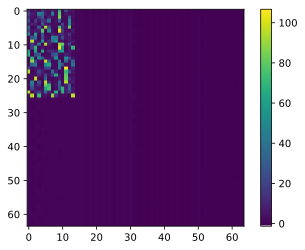

In [137]:
VreadGate = 5.0
vRead = 0.2
arr = 1
startRow = 0
startCol = 0
numRows = 26
numCols = 14
GMin = 2e-6
GMax = 100e-6

targetGVals = finalGconv
targetGThresh = 4e-6
targetRows = np.arange(startRow, startRow+numRows)
targetCols = np.arange(startCol, startCol+numCols)

vAppliedSet = np.arange(0.5, 2.5, 0.1)
vAppliedReset = np.arange(0.5, 3.4, 0.1)
vGateSet = np.arange(0.5, 1.7, 0.05)
vGateReset = np.arange(5.0, 5.5, 0.5)

gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.3e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])

GHistory = []
VHistory = []

VADC_boundary = np.array([0.4, 1.692, 1.927, 2.247, 2.645, 3.045, 3.391, 3.688, 4.1])
VRefHiCmp = np.array([5.0, 4.5, 4.2, 3.8, 3.4, 3.0, 2.7, 2.4])

_gain_ratio = [
    1e3,
    5e3,
    30e3,
    200e3,
    1e6
]

vOffset = -0.08
dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
Vgate = 5
Vref = 0.5


for j in range(numCols):
    cc = targetCols[j]
    for i in range(numRows):
        rr = targetRows[i]
        #print('Working on array', arr, ', device (row=', rr, 'col=', cc, ')')
        thisGtarget = targetGVals[i,j]
        thisGHistory = []
        thisVHistory = []
        thisGainHistory = []
        # Do a first read of this device
        adc_raw = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
        VADC_read_first = dut.adc2volt(adc_raw)
        gainFirst = adc_raw >> 10
        secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
        secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]+vOffset
        dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp+vOffset) 
        VADC_read_sec = dut.adc2volt(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=gainFirst, raw=True))
        finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
        dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
        rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]
        
        currG = rdCurr/vRead
        thisGHistory.append(currG)
        thisVHistory.append(0)
        #print('Initial G=', currG, 'Target G =', thisGtarget)
        initG = currG
        # Now, if device is lower than target, SET it
        if currG < (thisGtarget-targetGThresh):
            for vgate in vGateSet:
                for vappset in vAppliedSet:
                    # Apply vappset pulse, then read
                    a0.set_single_int(vappset, vgate, array=arr, row=rr, col=cc)

                    adc_raw = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
                    VADC_read_first = dut.adc2volt(adc_raw)
                    gainFirst = adc_raw >> 10
                    secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
                    secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]+vOffset
                    dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp+vOffset) 
                    VADC_read_sec = dut.adc2volt(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=gainFirst, raw=True))
                    finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
                    dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
                    rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]
                
                    currG = rdCurr/vRead
                    thisGHistory.append(currG)
                    thisVHistory.append(vappset)
                    if currG >= (thisGtarget-targetGThresh):
                        break
                if currG >= (thisGtarget-targetGThresh):
                    break
            GHistory.append(thisGHistory)
            VHistory.append(thisVHistory)

        # Else, if device is higher than target, RESET it, then SET it
        elif currG > (thisGtarget+targetGThresh):
            for vgate in vGateReset:
                for vappreset in vAppliedReset:
                    # Apply vappreset pulse, then read
                    a0.reset_single_int(vappreset, vgate, array=arr, row=rr, col=cc)

                    adc_raw = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
                    VADC_read_first = dut.adc2volt(adc_raw)
                    gainFirst = adc_raw >> 10
                    secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
                    secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]+vOffset
                    dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp+vOffset) 
                    VADC_read_sec = dut.adc2volt(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=gainFirst, raw=True))
                    finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
                    dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
                    rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]

                    currG = rdCurr/vRead
                    thisGHistory.append(currG)
                    thisVHistory.append(-1*vappreset)
                    if currG <= (thisGtarget+targetGThresh):
                        break
                if currG <= (thisGtarget+targetGThresh):
                    break

            #Now if it is below Gtarget, then do SET operations; If it is above Gtarget, then Reset failed and device stuck ON
            
            #if currG <= thisGtarget and thisGtarget >= 2.5e-6:
            if currG <= (thisGtarget-targetGThresh):
                for vgate in vGateSet:
                    for vappset in vAppliedSet:
                        # Apply vappset pulse, then read
                        a0.set_single_int(vappset, vgate, array=arr, row=rr, col=cc)

                        adc_raw = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
                        VADC_read_first = dut.adc2volt(adc_raw)
                        gainFirst = adc_raw >> 10
                        secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
                        secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]+vOffset
                        dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp+vOffset) 
                        VADC_read_sec = dut.adc2volt(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=gainFirst, raw=True))
                        finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
                        dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
                        rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]
                    
                        currG = rdCurr/vRead
                        thisGHistory.append(currG)
                        thisVHistory.append(vappset)
                        if currG >= (thisGtarget-targetGThresh):
                            break
                    if currG >= (thisGtarget-targetGThresh):
                        break

            GHistory.append(thisGHistory)
            VHistory.append(thisVHistory)
            print('Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Target G=', thisGtarget, ' Final G=', currG)
        
time.sleep(30)
arr = 1
numRows = 64
numCols = 64
vRead = 0.2
vReadGate = 5.0
gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.2e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])
Gmap1post = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            adc_raw = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
            VADC_read_first = dut.adc2volt(adc_raw)
            gainFirst = adc_raw >> 10
            secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
            secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]+vOffset
            dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp+vOffset) 
            VADC_read_sec = dut.adc2volt(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=gainFirst, raw=True))
            finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
            dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
            rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]
        
            Gmap1post[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap1post)
plt.colorbar()

time.sleep(30)
save_workspace(vars(), note='Prober2_UpdatedConv_Progr_ARRAY1')

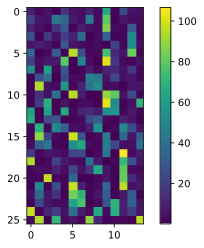

In [138]:
plt.imshow(Gmap1post[0:26,0:14])
plt.colorbar()

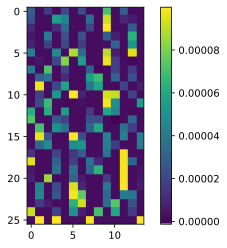

In [140]:
plt.imshow(finalGconv)
plt.colorbar()

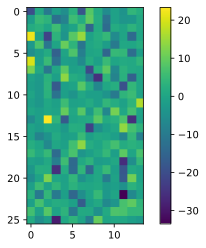

In [142]:
errorG = finalGconv
errorG = Gmap1post[0:26,0:14] - finalGconv*1e6
plt.imshow(errorG)
plt.colorbar()

4.054318428039551


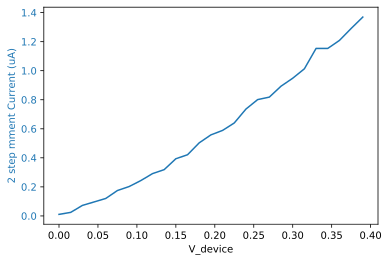

In [146]:
VADC_boundary = np.array([0.4, 1.692, 1.927, 2.247, 2.645, 3.045, 3.391, 3.688, 4.1])
VRefHiCmp = np.array([5.0, 4.5, 4.2, 3.8, 3.4, 3.0, 2.7, 2.4])

_gain_ratio = [
    1e3,
    5e3,
    30e3,
    200e3,
    1e6
]

vOffset = -0.08
dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)

#ts = time.time()

arr = 1
rr = 0
cc = 1
vRead = 0.2
vReadGate = 5.0
Vreads = np.arange(0, 0.4, 0.015)
Vgate = 5
Vref = 0.5
CurrRead2Step = []
vRefHiCmpHistory = []
VADCHistory = []
rdCurrFirstHistory = []

ts = time.time()
for vread in Vreads:

    adc_raw = a0.read_single_int(vread, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
    VADC_read_first = dut.adc2volt(adc_raw)
    VADCHistory.append(VADC_read_first)
    gainFirst = adc_raw >> 10
    rdCurrFirst = (VADC_read_first - 0.5) / _gain_ratio[gainFirst]
    rdCurrFirstHistory.append(rdCurrFirst)
    secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
    secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]+vOffset
    vRefHiCmpHistory.append(secondVRefHiCmp)
    dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp+vOffset) 
    #time.sleep(0.1)
    VADC_read_sec = dut.adc2volt(a0.read_single_int(vread, Vgate, array=arr, row=rr, col=cc, gain=gainFirst, raw=True))
    finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
    dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
    #time.sleep(0.1)
    rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]
    CurrRead2Step.append(rdCurr)
print(time.time()-ts)

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('V_device')
ax1.set_ylabel('2 step mment Current (uA)', color=color)
ax1.plot(Vreads, [i*1e6 for i in CurrRead2Step], color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#color = 'tab:red'
## we already handled the x-label with ax1
#ax2.set_ylabel('1 step AGC Current (uA)', color=color)
#ax2.plot(Vreads, [i*1e6 for i in rdCurrFirstHistory], color=color)
#ax2.tick_params(axis='y', labelcolor=color)

In [150]:
dut.dac_set('DAC_VREF_ARRAY', 0.423)
dut.dac_set('P_VREF_TIA', 0.425)

In [152]:
dut.dac_set('DAC_VREF_ARRAY', 0.423)
dut.dac_set('P_VREF_TIA', 0.425)
dut.dac_set('P_VREF_SH', 2.42)
dut.dac_set('PLANE_VPP', 0.22)
dut.dac_set('DAC_VP_PAD', 2.5)
dut.dac_set('P_TVDD', 1)
dut.dac_set('P_VAGC_0', 1)
dut.dac_set('P_VAGC_1', 3.9)
dut.dac_set('DAC_VREF_HI_CMP', 3.92)
dut.dac_set('P_ADC_EXT_TEST_IN', 1)
# dac_set('P_ADC_EXT_TEST_IN', 0)
dut.dac_set('P_AMP_VREF', 2.5)
dut.dac_set('P_AMP_INPUT', 2.5)

In [154]:
import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv
dut.reset_chip()
dut.reset_dpe()
dut.ground_PIC()
dut.power_on()
drv.clk_stop('ADC_CK')
drv.clk_stop('CK_ARRAY')
drv.clk_config('ADC_CK', divisor=20)
drv.clk_config('CK_ARRAY', divisor=20)
drv.clk_start('ADC_CK')
drv.clk_start('CK_ARRAY')

DAC initialized to a span from -10 V to 10 V
Setting ADC_CK freq=5000.0kHz
Setting CK_ARRAY freq=5000.0kHz


24.893094062805176


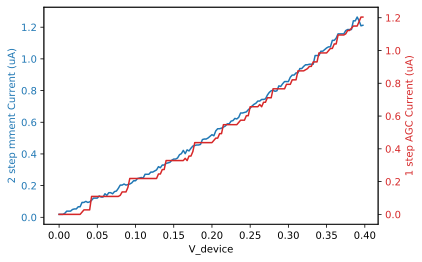

In [156]:
VADC_boundary = np.array([0.4, 1.692, 1.927, 2.247, 2.645, 3.045, 3.391, 3.688, 4.1])
VRefHiCmp = np.array([5.3, 4.5, 4.2, 3.8, 3.4, 3.0, 2.7, 2.4])

_gain_ratio = [
    1e3,
    5e3,
    30e3,
    200e3,
    1e6
]

vOffset = -0.08
dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)

#ts = time.time()

arr = 1
rr = 0
cc = 1
vRead = 0.2
vReadGate = 5.0
Vreads = np.arange(0, 0.4, 0.0025)
Vgate = 5
Vref = 0.5
CurrRead2Step = []
vRefHiCmpHistory = []
VADCHistory = []
rdCurrFirstHistory = []

ts = time.time()
for vread in Vreads:

    adc_raw = a0.read_single_int(vread, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
    VADC_read_first = dut.adc2volt(adc_raw)
    VADCHistory.append(VADC_read_first)
    gainFirst = adc_raw >> 10
    rdCurrFirst = (VADC_read_first - 0.5) / _gain_ratio[gainFirst]
    rdCurrFirstHistory.append(rdCurrFirst)
    secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
    secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]+vOffset
    vRefHiCmpHistory.append(secondVRefHiCmp)
    dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp+vOffset) 
    #time.sleep(0.1)
    VADC_read_sec = dut.adc2volt(a0.read_single_int(vread, Vgate, array=arr, row=rr, col=cc, gain=gainFirst, raw=True))
    finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
    dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
    #time.sleep(0.1)
    rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]
    CurrRead2Step.append(rdCurr)
print(time.time()-ts)

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('V_device')
ax1.set_ylabel('2 step mment Current (uA)', color=color)
ax1.plot(Vreads, [i*1e6 for i in CurrRead2Step], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.set_ylabel('1 step AGC Current (uA)', color=color)
ax2.plot(Vreads, [i*1e6 for i in rdCurrFirstHistory], color=color)
ax2.tick_params(axis='y', labelcolor=color)

11.92002248764038


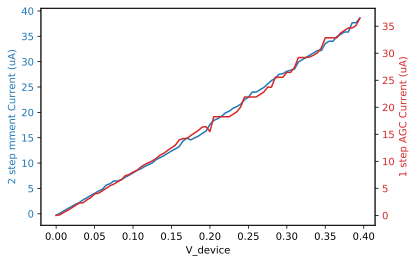

In [163]:
VADC_boundary = np.array([0.4, 1.692, 1.927, 2.247, 2.645, 3.045, 3.391, 3.688, 4.1])
VRefHiCmp = np.array([5.3, 4.5, 4.2, 3.8, 3.4, 3.0, 2.7, 2.4])

_gain_ratio = [
    1e3,
    5e3,
    30e3,
    200e3,
    1e6
]

vOffset = -0.08
dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)

#ts = time.time()

arr = 1
rr = 6
cc = 9
vRead = 0.2
vReadGate = 5.0
Vreads = np.arange(0, 0.4, 0.005)
Vgate = 5
Vref = 0.5
CurrRead2Step = []
vRefHiCmpHistory = []
VADCHistory = []
rdCurrFirstHistory = []

ts = time.time()
for vread in Vreads:

    adc_raw = a0.read_single_int(vread, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
    VADC_read_first = dut.adc2volt(adc_raw)
    VADCHistory.append(VADC_read_first)
    gainFirst = adc_raw >> 10
    rdCurrFirst = (VADC_read_first - 0.5) / _gain_ratio[gainFirst]
    rdCurrFirstHistory.append(rdCurrFirst)
    secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
    secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]+vOffset
    vRefHiCmpHistory.append(secondVRefHiCmp)
    dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp+vOffset) 
    #time.sleep(0.1)
    VADC_read_sec = dut.adc2volt(a0.read_single_int(vread, Vgate, array=arr, row=rr, col=cc, gain=gainFirst, raw=True))
    finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
    dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
    #time.sleep(0.1)
    rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]
    CurrRead2Step.append(rdCurr)
print(time.time()-ts)

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('V_device')
ax1.set_ylabel('2 step mment Current (uA)', color=color)
ax1.plot(Vreads, [i*1e6 for i in CurrRead2Step], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.set_ylabel('1 step AGC Current (uA)', color=color)
ax2.plot(Vreads, [i*1e6 for i in rdCurrFirstHistory], color=color)
ax2.tick_params(axis='y', labelcolor=color)

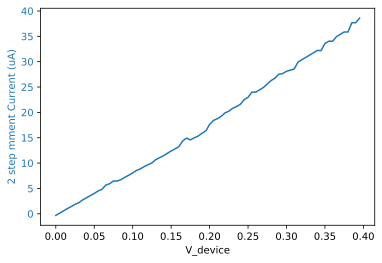

In [164]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('V_device')
ax1.set_ylabel('2 step mment Current (uA)', color=color)
ax1.plot(Vreads, [i*1e6 for i in CurrRead2Step], color=color)
ax1.tick_params(axis='y', labelcolor=color)

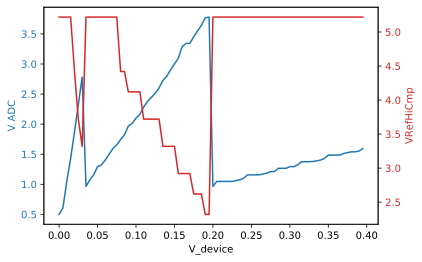

In [165]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('V_device')
ax1.set_ylabel('V ADC', color=color)
ax1.plot(Vreads, [i for i in VADCHistory], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.set_ylabel('VRefHiCmp', color=color)
ax2.plot(Vreads, [i for i in vRefHiCmpHistory], color=color)
ax2.tick_params(axis='y', labelcolor=color)

Array 2 , device (row= 0 col= 0 ) Init G= 1.5773216031280544e-05  Target G= 2.9341765184653923e-05  Final G= 3.065591397849463e-05
Array 2 , device (row= 1 col= 0 ) Init G= 1.551661779081135e-05  Target G= 2.4320306692970917e-05  Final G= 2.6550342130987303e-05
Array 2 , device (row= 2 col= 0 ) Init G= 5.652199413489738e-06  Target G= 9.42114638746716e-06  Final G= 5.652199413489738e-06
Array 2 , device (row= 3 col= 0 ) Init G= 1.0772922776148583e-05  Target G= 5.051698735769605e-06  Final G= 7.286119257086998e-06
Array 2 , device (row= 4 col= 0 ) Init G= 1.5773216031280544e-05  Target G= 8.179570613719989e-06  Final G= 6.949364613880742e-06
Array 2 , device (row= 5 col= 0 ) Init G= 1.782600195503422e-05  Target G= 4.1807554225670174e-05  Final G= 4.5326001955034204e-05
Array 2 , device (row= 6 col= 0 ) Init G= 2.1076246334310852e-05  Target G= 1.9999999949504854e-06  Final G= 5.207429130009777e-06
Array 2 , device (row= 7 col= 0 ) Init G= 7.204887585532746e-05  Target G= 4.07888364861

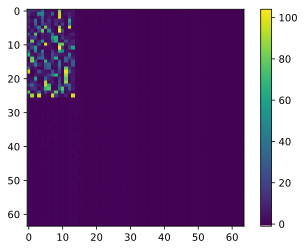

In [166]:
VreadGate = 5.0
vRead = 0.2
arr = 2
startRow = 0
startCol = 0
numRows = 26
numCols = 14
GMin = 2e-6
GMax = 100e-6

targetGVals = finalGconv
targetGThresh = 4e-6
targetRows = np.arange(startRow, startRow+numRows)
targetCols = np.arange(startCol, startCol+numCols)

vAppliedSet = np.arange(0.5, 2.5, 0.1)
vAppliedReset = np.arange(0.5, 3.5, 0.1)
vGateSet = np.arange(0.5, 1.7, 0.05)
vGateReset = np.arange(5.0, 5.5, 0.5)

gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.3e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])

GHistory = []
VHistory = []

VADC_boundary = np.array([0.4, 1.692, 1.927, 2.247, 2.645, 3.045, 3.391, 3.688, 4.1])
VRefHiCmp = np.array([5.3, 4.5, 4.2, 3.8, 3.4, 3.0, 2.7, 2.4])

_gain_ratio = [
    1e3,
    5e3,
    30e3,
    200e3,
    1e6
]

vOffset = -0.08
dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
Vgate = 5
Vref = 0.5


for j in range(numCols):
    cc = targetCols[j]
    for i in range(numRows):
        rr = targetRows[i]
        #print('Working on array', arr, ', device (row=', rr, 'col=', cc, ')')
        thisGtarget = targetGVals[i,j]
        thisGHistory = []
        thisVHistory = []
        thisGainHistory = []
        # Do a first read of this device
        adc_raw = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
        VADC_read_first = dut.adc2volt(adc_raw)
        gainFirst = adc_raw >> 10
        secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
        secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]+vOffset
        dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp+vOffset) 
        VADC_read_sec = dut.adc2volt(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=gainFirst, raw=True))
        finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
        dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
        rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]
        
        currG = rdCurr/vRead
        thisGHistory.append(currG)
        thisVHistory.append(0)
        #print('Initial G=', currG, 'Target G =', thisGtarget)
        initG = currG
        # Now, if device is lower than target, SET it
        if currG < (thisGtarget-targetGThresh):
            for vgate in vGateSet:
                for vappset in vAppliedSet:
                    # Apply vappset pulse, then read
                    a0.set_single_int(vappset, vgate, array=arr, row=rr, col=cc)

                    adc_raw = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
                    VADC_read_first = dut.adc2volt(adc_raw)
                    gainFirst = adc_raw >> 10
                    secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
                    secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]+vOffset
                    dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp+vOffset) 
                    VADC_read_sec = dut.adc2volt(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=gainFirst, raw=True))
                    finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
                    dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
                    rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]
                
                    currG = rdCurr/vRead
                    thisGHistory.append(currG)
                    thisVHistory.append(vappset)
                    if currG >= (thisGtarget-targetGThresh):
                        break
                if currG >= (thisGtarget-targetGThresh):
                    break
            GHistory.append(thisGHistory)
            VHistory.append(thisVHistory)

        # Else, if device is higher than target, RESET it, then SET it
        elif currG > (thisGtarget+targetGThresh):
            for vgate in vGateReset:
                for vappreset in vAppliedReset:
                    # Apply vappreset pulse, then read
                    a0.reset_single_int(vappreset, vgate, array=arr, row=rr, col=cc)

                    adc_raw = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
                    VADC_read_first = dut.adc2volt(adc_raw)
                    gainFirst = adc_raw >> 10
                    secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
                    secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]+vOffset
                    dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp+vOffset) 
                    VADC_read_sec = dut.adc2volt(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=gainFirst, raw=True))
                    finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
                    dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
                    rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]

                    currG = rdCurr/vRead
                    thisGHistory.append(currG)
                    thisVHistory.append(-1*vappreset)
                    if currG <= (thisGtarget+targetGThresh):
                        break
                if currG <= (thisGtarget+targetGThresh):
                    break

            #Now if it is below Gtarget, then do SET operations; If it is above Gtarget, then Reset failed and device stuck ON
            
            #if currG <= thisGtarget and thisGtarget >= 2.5e-6:
            if currG <= (thisGtarget-targetGThresh):
                for vgate in vGateSet:
                    for vappset in vAppliedSet:
                        # Apply vappset pulse, then read
                        a0.set_single_int(vappset, vgate, array=arr, row=rr, col=cc)

                        adc_raw = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
                        VADC_read_first = dut.adc2volt(adc_raw)
                        gainFirst = adc_raw >> 10
                        secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
                        secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]+vOffset
                        dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp+vOffset) 
                        VADC_read_sec = dut.adc2volt(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=gainFirst, raw=True))
                        finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
                        dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
                        rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]
                    
                        currG = rdCurr/vRead
                        thisGHistory.append(currG)
                        thisVHistory.append(vappset)
                        if currG >= (thisGtarget-targetGThresh):
                            break
                    if currG >= (thisGtarget-targetGThresh):
                        break

        GHistory.append(thisGHistory)
        VHistory.append(thisVHistory)
        print('Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Target G=', thisGtarget, ' Final G=', currG)
        
time.sleep(15)
arr = 2
numRows = 64
numCols = 64
vRead = 0.2
vReadGate = 5.0
gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.2e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])
Gmap2post = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            adc_raw = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1, raw=True)
            VADC_read_first = dut.adc2volt(adc_raw)
            gainFirst = adc_raw >> 10
            secondVRefHiCmpIndex = np.searchsorted(VADC_boundary,VADC_read_first)-1
            secondVRefHiCmp = VRefHiCmp[secondVRefHiCmpIndex]+vOffset
            dut.dac_set('DAC_VREF_HI_CMP', secondVRefHiCmp+vOffset) 
            VADC_read_sec = dut.adc2volt(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=gainFirst, raw=True))
            finalADCOut = VADC_read_sec - (secondVRefHiCmp - 4.0) 
            dut.dac_set('DAC_VREF_HI_CMP', 4.0+vOffset)
            rdCurr = (finalADCOut - 0.5) / _gain_ratio[gainFirst]
        
            Gmap2post[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap2post)
plt.colorbar()

time.sleep(15)
save_workspace(vars(), note='Prober2_UpdatedConv_Progr_ARRAY2')

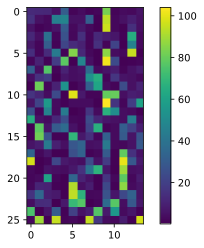

In [167]:
plt.imshow(Gmap2post[0:26,0:14])
plt.colorbar()

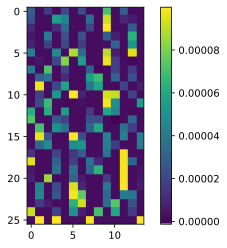

In [168]:
plt.imshow(finalGconv)
plt.colorbar()